In [ ]:
#  Visualization: Bar Chart – Average PerformanceRating per Department

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
avg_rating = df_raw.groupby("EmpDepartment")["PerformanceRating"].mean().sort_values()

/tmp/ipython-input-3-1115672455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.index, y=avg_rating.values, palette="Blues_d")


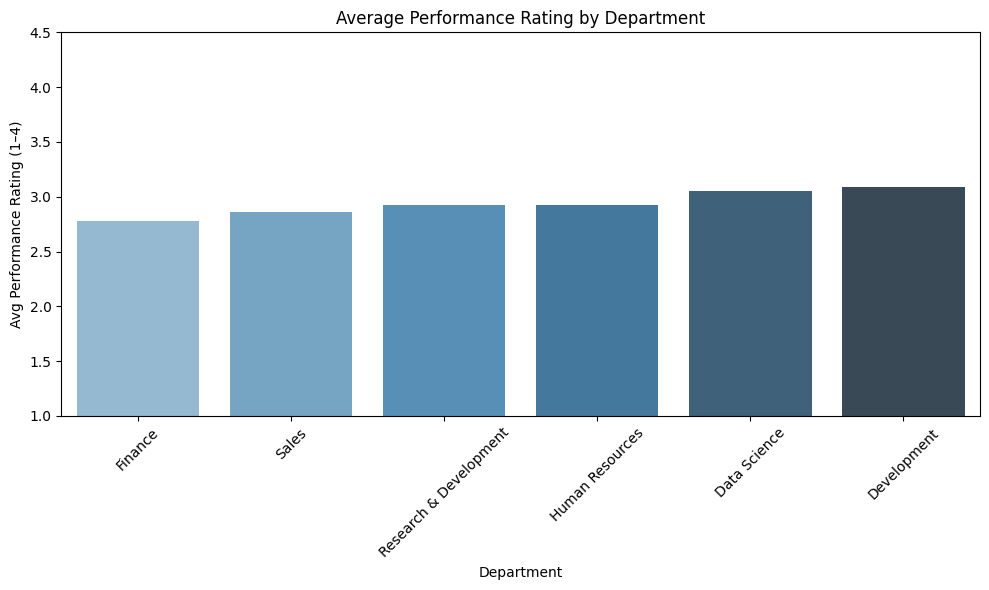

In [3]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette="Blues_d")
plt.title("Average Performance Rating by Department")
plt.xlabel("Department")
plt.ylabel("Avg Performance Rating (1–4)")
plt.xticks(rotation=45)
plt.ylim(1, 4.5)
plt.tight_layout()
plt.show()

In [ ]:
# Top 3 Factors Affecting Employee Performance

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
# Create a copy to work with
data = df.copy()

# Drop ID column
data = data.drop(columns=['EmpNumber'])

In [8]:
# Encode categorical text columns
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})

In [9]:
# One-hot encode remaining text columns
data = pd.get_dummies(data, drop_first=True)

In [10]:
# Separate features (X) and target (y)
X = data.drop('PerformanceRating', axis=1)
y = data['PerformanceRating']

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [12]:
import numpy as np

In [13]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

In [14]:
# Combine into a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

In [15]:
# Sort and display top 3
top_3 = importance_df.sort_values(by='Importance', ascending=False).head(3)
print(top_3)

                       Feature  Importance
11    EmpLastSalaryHikePercent    0.191397
4   EmpEnvironmentSatisfaction    0.176799
18     YearsSinceLastPromotion    0.081002


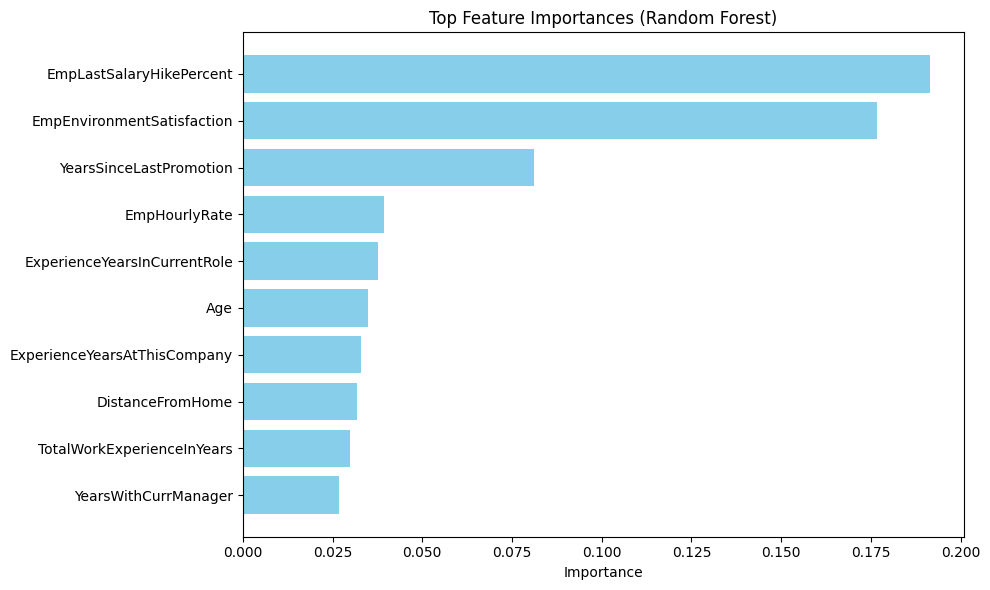

In [16]:
import matplotlib.pyplot as plt
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Top Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
#Predictive Model for Hiring

In [24]:
if 'EmpNumber' in df.columns:
    df = df.drop(columns=['EmpNumber'])


In [25]:
# Label encode binary columns
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [26]:
# One-hot encode multi-class categorical columns
df = pd.get_dummies(df, drop_first=True)

In [28]:
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

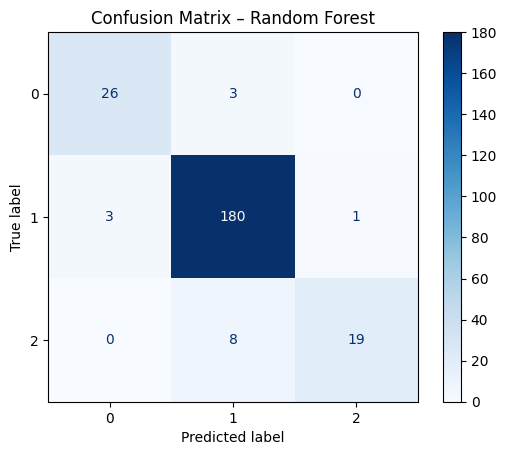

In [32]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.show()